In [ ]:
#Helper Code for Residuals

resids = residuals(model)
#Example for Q1, adjust start and frequency as appropriate
resids.ts = ts(resids,start=1950,freq=12)

#Use this for moving average model, mav.model. It doesn't work with residuals function
temp.fit.mav=ts(mav.model$y,start=1950,frequency=12)
resids = temp-temp.fit.mav

ts.plot(resids.ts,main="Model X Residuals")
#Optional, makes it easier to assess non-constant average
abline(a=mean(resids.ts),b=0,col='red')

acf(resids.ts,,main='ACF of Model X Residuals')

In [1]:
library(TSA)
library(mgcv)
install.packages("nbconvertR")
library(nbconvertR)
install.packages("ggplot2")
library("ggplot2")


Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar

Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Installing package into 'C:/Users/bbalamdari/OneDrive - Ecolab/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'nbconvertR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\Rtmpam4WZh\downloaded_packages


Warning message:
"package 'nbconvertR' was built under R version 3.6.3"Installing package into 'C:/Users/bbalamdari/OneDrive - Ecolab/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\Rtmpam4WZh\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [2]:
edvoldata = read.csv("EGD.csv",header=T)
## Process Dates
year = edvoldata$Year
month = edvoldata$Month
day = edvoldata$Day

head(edvoldata, n=10)


,Year,Month,Day,Volume
,<int>,<int>,<int>,<int>
1,2010,1,1,135
2,2010,1,2,163
3,2010,1,3,139
4,2010,1,4,139
5,2010,1,5,122
6,2010,1,6,119
7,2010,1,7,118
8,2010,1,8,133
9,2010,1,9,125


In [3]:
datemat = cbind(as.character(day),as.character(month),as.character(year))

paste.dates = function(date){
    day = date[1]; month=date[2]; year = date[3]
    return(paste(day,month,year,sep="/"))
 }


dates = apply(datemat,1,paste.dates)
dates = as.Date(dates, format="%d/%m/%Y")
edvoldata = cbind(dates,edvoldata)
attach(edvoldata)
head(edvoldata, n=5)

The following object is masked _by_ .GlobalEnv:

    dates



,dates,Year,Month,Day,Volume
,<date>,<int>,<int>,<int>,<int>
1,2010-01-01,2010,1,1,135
2,2010-01-02,2010,1,2,163
3,2010-01-03,2010,1,3,139
4,2010-01-04,2010,1,4,139
5,2010-01-05,2010,1,5,122


In [4]:
Volume.tr = sqrt(Volume+3/8)

## Model Trend + Monthly Seasonality
library(mgcv)
time.pts = c(1:length(Volume))
time.pts = c(time.pts - min(time.pts))/max(time.pts)
month = as.factor(format(dates,"%b"))
week = as.factor(weekdays(dates))
gam.fit.seastr = gam(Volume.tr~s(time.pts)+month+week)
vol.fit.gam.seastr = fitted(gam.fit.seastr)
resid.process = Volume.tr-vol.fit.gam.seastr


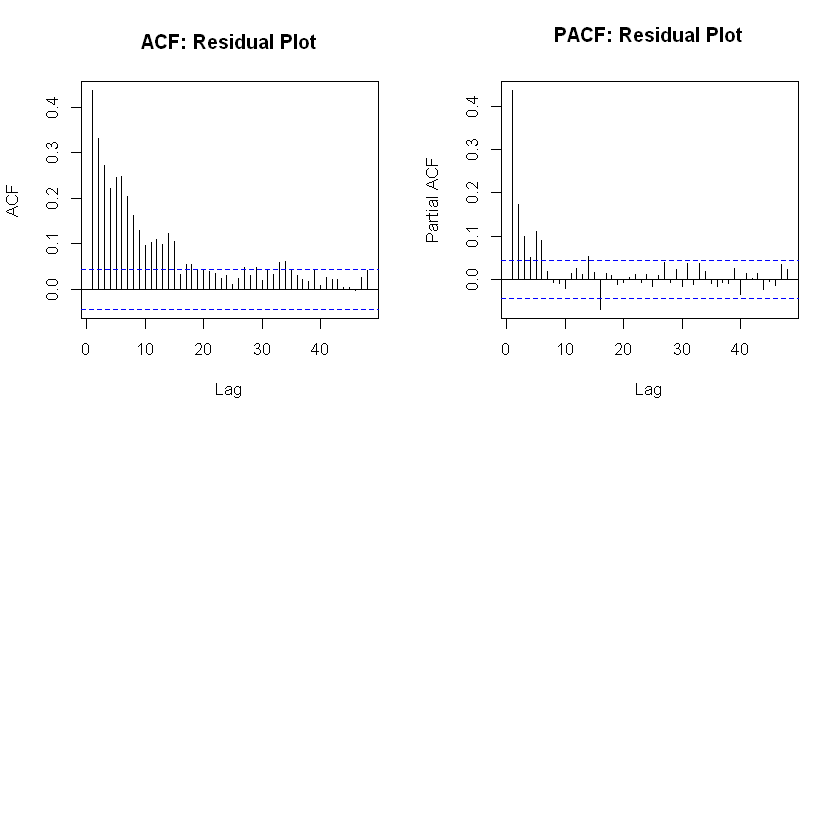

In [5]:
par(mfrow=c(2,2))

################################################################
acf(resid.process,lag.max=12*4,main="ACF: Residual Plot")
pacf(resid.process,lag.max=12*4,main="PACF: Residual Plot")
###############################################################

In [13]:
mod$ar
roots

[1] 0.323319100 0.119829014 0.061306458 0.001987803 0.081843376 0.089084827

[1]  0.763280+1.245970i -0.893764+1.314184i -0.893764-1.314184i
[4]  1.150875-0.000000i  0.763280-1.245970i -1.808621+0.000000i

[1] 6


             Length Class  Mode     
order           1   -none- numeric  
ar              6   -none- numeric  
var.pred        1   -none- numeric  
x.mean          1   -none- numeric  
aic            21   -none- numeric  
n.used          1   -none- numeric  
n.obs           1   -none- numeric  
order.max       1   -none- numeric  
partialacf     20   -none- numeric  
resid        1977   -none- numeric  
method          1   -none- character
series          1   -none- character
frequency       1   -none- numeric  
call            3   -none- call     
asy.var.coef   36   -none- numeric  

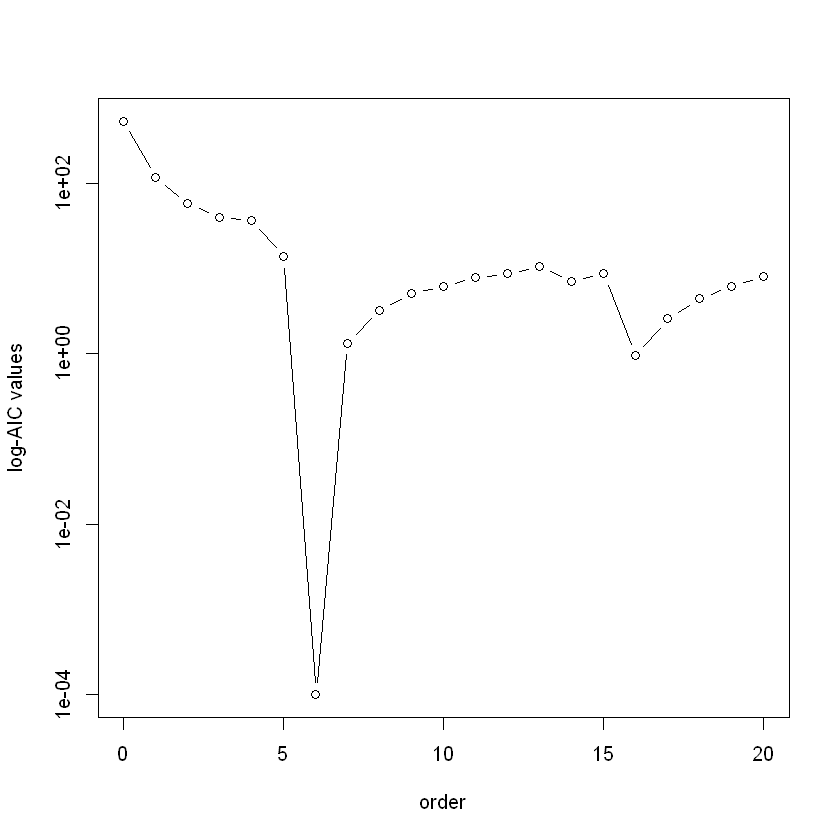

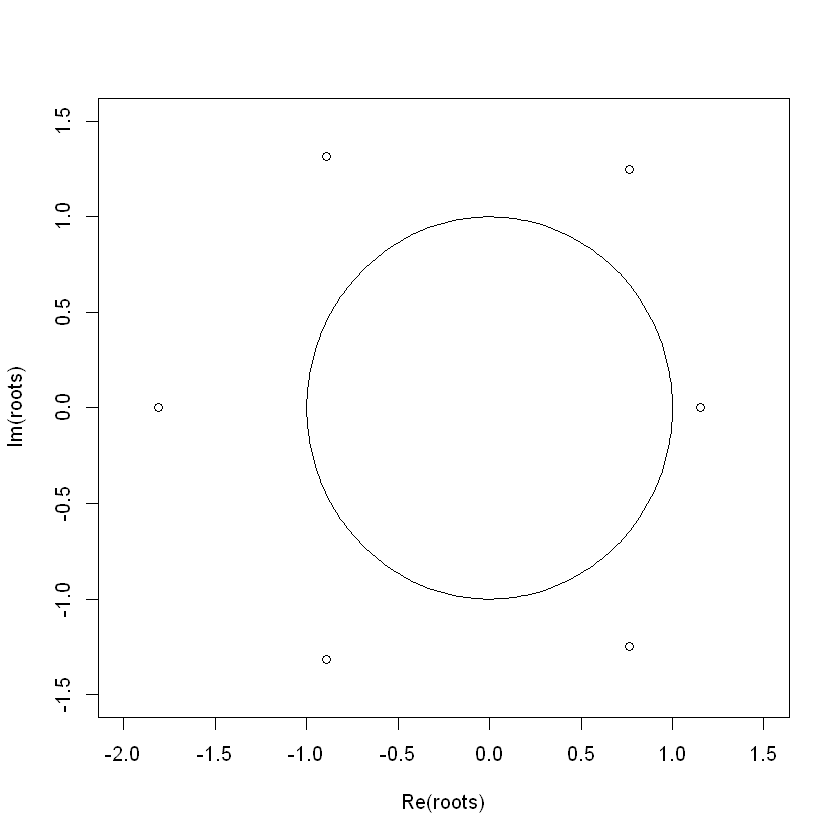

In [11]:

library(TSA)
###### Fit an AR(p) process for for p<= order.max ####
mod = ar(resid.process,order.max=20)
# What is the selected order?
print(mod$order)
# find the list of arguments provided by AR fit
summary(mod)
# plot aic values
# On non-log scale it is difficult to detect the minimum.
plot(c(0:20),mod$aic+.0001, type="b",log="y",xlab="order",ylab="log-AIC values")

# Are the roots of fitted AR within the unit circle?
# extract roots from the model output
roots = polyroot(c(1,(-mod$ar)))
# adjust the x and y -axis limits to include the full circle
plot(roots,xlim=c(-2,1.5),ylim=c(-1.5,1.5))
# draw a unit root circle
lines(complex(arg = seq(0,2*pi,len=300)))

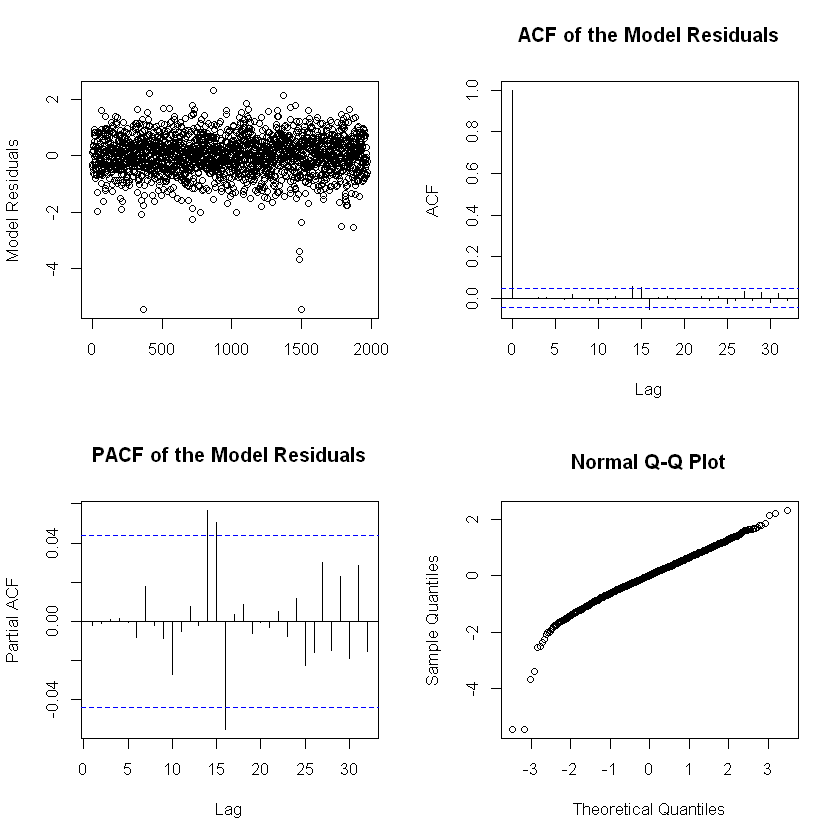

In [17]:
# residuals analysis
resids = (mod$resid[(mod$order+1): length(mod$resid)])


par(mfrow=c(2,2))
plot(resids,xlab="",ylab="Model Residuals")
stats::acf(resids,main='ACF of the Model Residuals')
stats::pacf(resids,main='PACF of the Model Residuals')
qqnorm(resids)



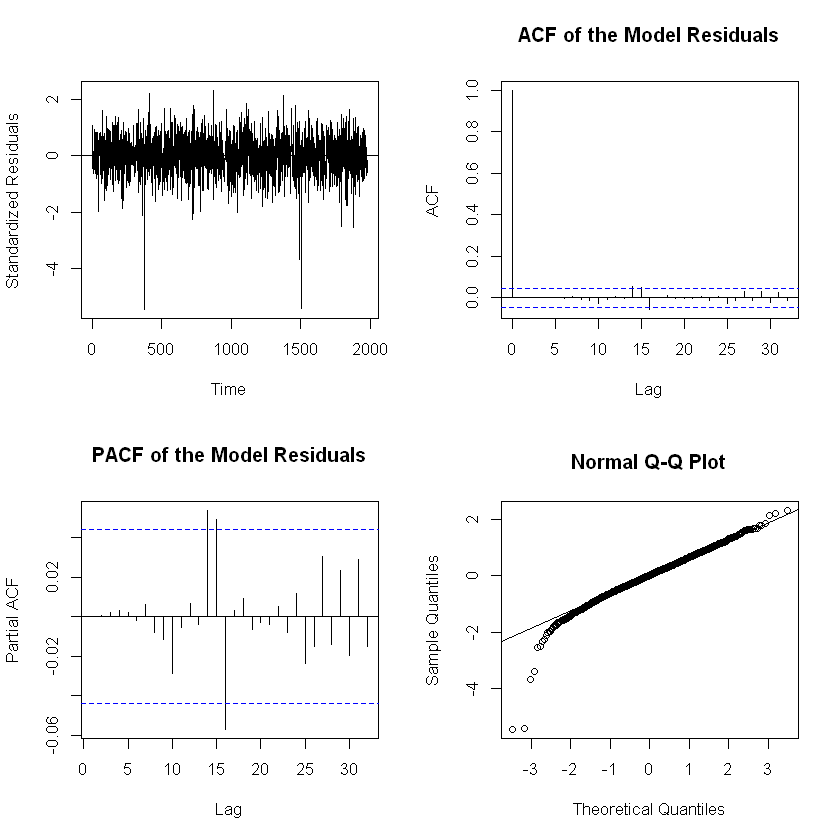

In [21]:
###### Fit an ARMA(p,q) for some values of p and q #####
modarma = arima(resid.process, order = c(6,0,1),method = "ML")

par (mfrow=c(2,2))
plot(resid(modarma), ylab='Standardized Residuals')
abline(h=0)
stats::acf(as.vector(resid(modarma)),main= 'ACF of the Model Residuals')
pacf(as.vector(resid(modarma)),main='PACF of the Model Residuals')
qqnorm(resid(modarma))
qqline(resid(modarma))



In [23]:
## Order selection -- EACF

eacf(resid.process,ar.max = 6, ma.max = 6)


AR/MA
  0 1 2 3 4 5 6
0 x x x x x x x
1 x o o x o x o
2 x x o x o o o
3 x o x x o o o
4 x x x x o o o
5 x x x x o o o
6 x x x x o x o


In [24]:
test_modelA <- function(p,d,q){
  model = arima(resid.process, order=c(p,d,q), method="ML")
  current.aic = AIC(model)
  df = data.frame(p,d,q,current.aic)
  names(df) <- c("p","d","q","AIC")
  print(paste(p,d,q,current.aic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf,Inf)
names(orders) <- c("p","d","q","AIC")


for (p in 0:6){
  for (d in 0:1){
    for (q in 0:3) {
      possibleError <- tryCatch(
        orders<-rbind(orders,test_modelA(p,d,q)),
        error=function(e) e
      )
      if(inherits(possibleError, "error")) next
      
    }
  }
}
orders <- orders[order(-orders$AIC),]
tail(orders)




[1] "0 0 0 4655.31811770853"
[1] "0 0 1 4363.76444610332"
[1] "0 0 2 4271.35143648715"
[1] "0 0 3 4217.12233160492"
[1] "0 1 0 4887.66157446694"
[1] "0 1 1 4235.71825769694"
[1] "0 1 2 4195.91936788822"
[1] "0 1 3 4185.05600707172"
[1] "1 0 0 4239.49163908714"
[1] "1 0 1 4143.29425598955"
[1] "1 0 2 4134.15623784083"
[1] "1 0 3 4134.44972858271"
[1] "1 1 0 4533.38366184787"
[1] "1 1 1 4185.37965454902"
[1] "1 1 2 4147.67093363336"


Warning message in log(s2):
"NaNs produced"

[1] "1 1 3 4138.33814283107"
[1] "2 0 0 4181.36890395138"
[1] "2 0 1 4133.0782060437"
[1] "2 0 2 4134.7545725054"
[1] "2 0 3 4138.15648993948"
[1] "2 1 0 4409.73922784351"
[1] "2 1 1 4174.32503448052"
[1] "2 1 2 4137.27164125386"
[1] "2 1 3 4144.21304682698"
[1] "3 0 0 4163.85516559926"
[1] "3 0 1 4134.62856006829"


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "3 0 2 4135.06286347661"


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "3 0 3 4136.49389512494"
[1] "3 1 0 4357.89005835097"
[1] "3 1 1 4170.59207365357"
[1] "3 1 2 4138.86061016807"
[1] "3 1 3 4141.07251341017"
[1] "4 0 0 4160.78806753734"
[1] "4 0 1 4136.26671351235"
[1] "4 0 2 4136.07934056632"
[1] "4 0 3 4129.6515943323"
[1] "4 1 0 4280.82688672509"
[1] "4 1 1 4171.77844253477"
[1] "4 1 2 4174.43915350277"
[1] "4 1 3 4140.46155888092"
[1] "5 0 0 4138.03742556906"
[1] "5 0 1 4126.98640422842"
[1] "5 0 2 4123.74891136786"


Warning message in log(s2):
"NaNs produced"

[1] "5 0 3 4125.71730038816"
[1] "5 1 0 4234.68353970956"
[1] "5 1 1 4142.46242878237"
[1] "5 1 2 4131.16736684901"
[1] "5 1 3 4128.10560366026"
[1] "6 0 0 4124.19635955571"
[1] "6 0 1 4125.64282886115"
[1] "6 0 2 4125.72653700957"
[1] "6 0 3 4127.74199217495"
[1] "6 1 0 4225.69249936193"
[1] "6 1 1 4128.44156736919"
[1] "6 1 2 4129.86798108213"
[1] "6 1 3 4131.45326536477"


,p,d,q,AIC
,<dbl>,<dbl>,<dbl>,<dbl>
43,5,0,1,4126.986
52,6,0,2,4125.727
45,5,0,3,4125.717
51,6,0,1,4125.643
50,6,0,0,4124.196
44,5,0,2,4123.749


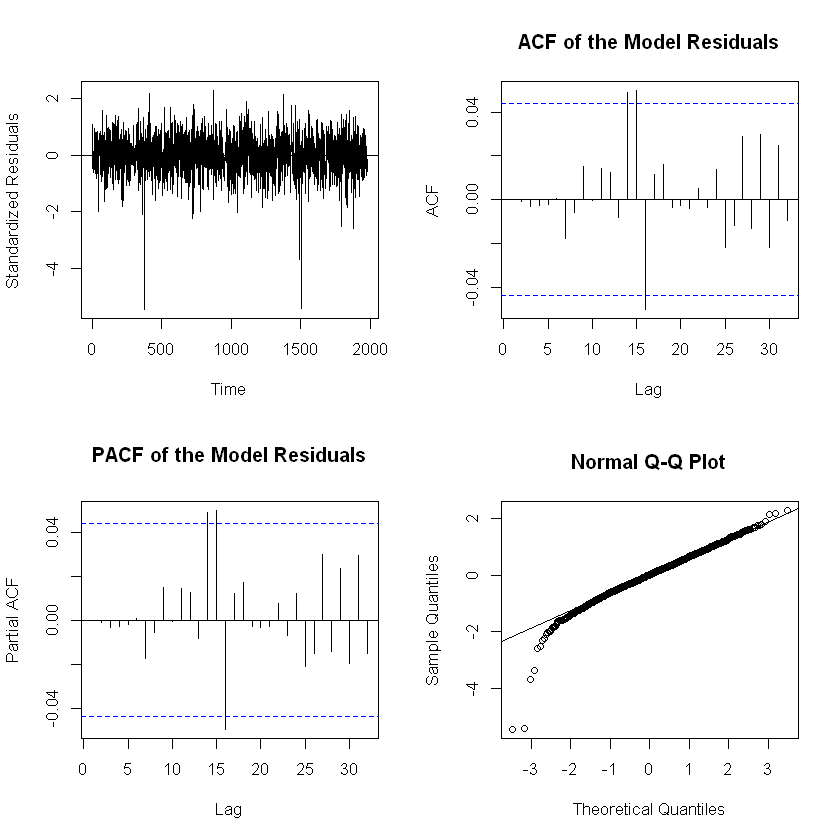

In [27]:
final_model = arima(resid.process,order = c(5,0,2), method='ML')

par (mfrow=c(2,2))
plot(resid(final_model), ylab='Standardized Residuals')
abline(h=0)
acf(as.vector(resid(final_model)),main= 'ACF of the Model Residuals')
pacf(as.vector(resid(final_model)),main='PACF of the Model Residuals')
qqnorm(resid(final_model))
qqline(resid(final_model))


In [28]:
#### Test for Independence for final model
porder=5
qorder=2
Box.test(final_model$resid, lag = (porder+qorder+1), type = "Box-Pierce", fitdf = (porder+qorder))
Box.test(final_model$resid, lag = (porder+qorder+1), type = "Ljung-Box", fitdf = (porder+qorder))

#### Test for Independence for smaller model
Box.test(modarma$resid, lag = (porder+qorder+1), type = "Box-Pierce", fitdf = (porder+qorder))
Box.test(modarma$resid, lag = (porder+qorder+1), type = "Ljung-Box", fitdf = (porder+qorder))


	Box-Pierce test

data:  final_model$resid
X-squared = 0.72553, df = 1, p-value = 0.3943



	Box-Ljung test

data:  final_model$resid
X-squared = 0.7288, df = 1, p-value = 0.3933



	Box-Pierce test

data:  modarma$resid
X-squared = 0.23846, df = 1, p-value = 0.6253



	Box-Ljung test

data:  modarma$resid
X-squared = 0.23954, df = 1, p-value = 0.6245
